<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/black_scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Black-Scholes Model (Option Pricing)**

The Black-Scholes formula for a **call option** is given by:

$
C = S_0 N(d_1) - X e^{-rT} N(d_2)
$

And for a **put option**:

$
P = X e^{-rT} N(-d_2) - S_0 N(-d_1)
$

Where:
- \( S_0 \) is the current stock price.
- \( X \) is the strike price.
- \( T \) is the time to maturity.
- \( r \) is the risk-free interest rate.
- \( \sigma \) is the volatility of the stock.
- $ N(d_1) $ and $ N(d_2) $ are the cumulative distribution functions of the standard normal distribution.
- $ d_1 = \frac{\ln(S_0/X) + (r + \sigma^2/2)T}{\sigma\sqrt{T}} $
- $ d_2 = d_1 - \sigma\sqrt{T} $

**Calculate the Black-Scholes price for European call and put options**

In [1]:
import numpy as np
import scipy.stats as si

def black_scholes(S, X, T, r, sigma, option_type="call"):
    """
    Calculate the Black-Scholes option price.

    Parameters:
    S : float : Current stock price
    X : float : Strike price of the option
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate (annual)
    sigma : float : Volatility of the stock (annualized)
    option_type : str : "call" or "put"

    Returns:
    float : Theoretical price of the option
    """
    # Calculate d1 and d2
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0)) - (X * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == "put":
        option_price = (X * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)) - (S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Example usage:
S = 100  # Current stock price
X = 110  # Strike price
T = 1    # Time to maturity (in years)
r = 0.05  # Risk-free rate (annual)
sigma = 0.2  # Volatility of the stock (annualized)

# Calculate the option prices
call_price = black_scholes(S, X, T, r, sigma, option_type="call")
put_price = black_scholes(S, X, T, r, sigma, option_type="put")

print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")

Call Option Price: 6.04
Put Option Price: 10.68


This means, based on the parameters provided (e.g., stock price, strike price, volatility), the call option has a price of approximately USD 7.97 and the put option is priced at USD 12.31.


1. **Inputs**:
   - `S`: Current stock price.
   - `X`: Strike price of the option.
   - `T`: Time to maturity in years.
   - `r`: Risk-free interest rate (e.g., from government bonds).
   - `sigma`: Volatility of the stock (annualized standard deviation of stock returns).
   - `option_type`: Specifies whether it's a **call** or **put** option.

2. **Calculation**:
   - We calculate \(d_1\) and \(d_2\) using the formulas provided.
   - Based on the option type (`call` or `put`), the respective formula is used to compute the price of the option.

3. **Output**:
   - The function returns the theoretical price of either the call or put option.

Optional Extension: visualize the option price across different variables such as volatility, time to maturity, or strike price to see how they affect the option pricing.

Visualize how **volatility**, **time to maturity**, and **strike price** affect the option price by plotting 3D surface plots.

1. Plot for Option price as a function of **volatility** and **time to maturity**.
2. Plot for Option price as a function of **strike price** and **time to maturity**.
3. Plot for Option price as a function of **volatility** and **strike price**.

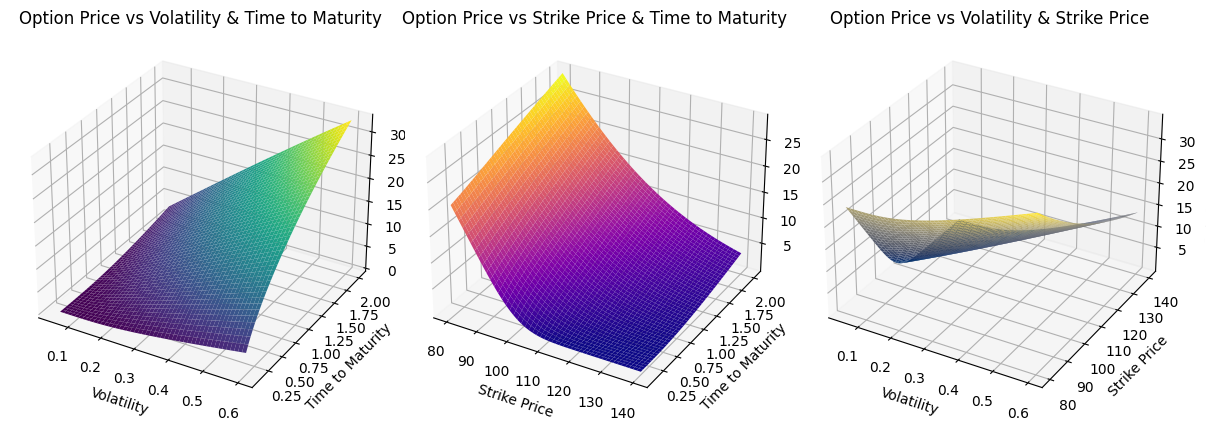

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def black_scholes(S, X, T, r, sigma, option_type="call"):
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0)) - (X * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == "put":
        option_price = (X * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)) - (S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Parameters
S = 100  # Current stock price
X_base = 110  # Base Strike price for some plots
T_base = 1    # Base time to maturity (in years)
r = 0.05  # Risk-free rate (annual)
sigma_base = 0.2  # Base volatility

# 1. Option price vs Volatility and Time to Maturity
volatilities = np.linspace(0.05, 0.6, 50)  # Varying volatilities
times = np.linspace(0.1, 2, 50)  # Varying times to maturity
vol, T = np.meshgrid(volatilities, times)

call_prices_vol_time = np.array([[black_scholes(S, X_base, t, r, v, option_type="call") for v in volatilities] for t in times])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(vol, T, call_prices_vol_time, cmap='viridis')
ax.set_xlabel('Volatility')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Call Option Price')
ax.set_title('Option Price vs Volatility & Time to Maturity')

# 2. Option price vs Strike Price and Time to Maturity
strike_prices = np.linspace(80, 140, 50)  # Varying strike prices
times = np.linspace(0.1, 2, 50)
X, T = np.meshgrid(strike_prices, times)

call_prices_strike_time = np.array([[black_scholes(S, x, t, r, sigma_base, option_type="call") for x in strike_prices] for t in times])

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, T, call_prices_strike_time, cmap='plasma')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Call Option Price')
ax.set_title('Option Price vs Strike Price & Time to Maturity')

# 3. Option price vs Volatility and Strike Price
strike_prices = np.linspace(80, 140, 50)
volatilities = np.linspace(0.05, 0.6, 50)
vol, X = np.meshgrid(volatilities, strike_prices)

call_prices_vol_strike = np.array([[black_scholes(S, x, T_base, r, v, option_type="call") for v in volatilities] for x in strike_prices])

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(vol, X, call_prices_vol_strike, cmap='cividis')
ax.set_xlabel('Volatility')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Call Option Price')
ax.set_title('Option Price vs Volatility & Strike Price')

plt.tight_layout()
plt.show()

1. **Option Price vs Volatility & Time to Maturity**:
   - This plot shows how the option price increases as the volatility (risk) increases. Time to maturity also impacts the price: the longer the time to expiration, the higher the option price (since more time means more uncertainty and potential for price changes).

2. **Option Price vs Strike Price & Time to Maturity**:
   - As the strike price increases, the call option price decreases, because a higher strike price makes the option less likely to be exercised profitably. Time to maturity still plays a role, with more time giving more value to the option.

3. **Option Price vs Volatility & Strike Price**:
   - As volatility increases, the price of the option rises. A lower strike price generally increases the value of a call option, because it's more likely to end "in the money."



Next Steps: You can try adjusting parameters such as the risk-free rate, the current stock price, or the option type to see how these affect the visualizations. This should give you a clearer understanding of how different factors influence option pricing. Let's adjust the following parameters and create visualizations to observe their impact on the option pricing:

1. **Risk-Free Rate**: We'll vary the risk-free interest rate and see how it affects the option price.
2. **Stock Price**: We'll change the current stock price to see how the option price reacts.
3. **Option Type**: We'll compare the prices of **call** and **put** options.

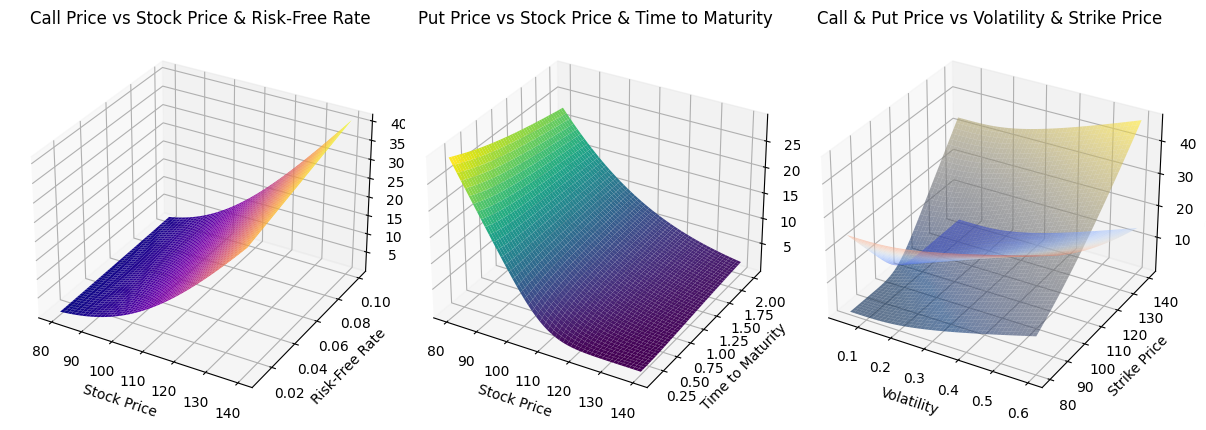

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# Black-Scholes function
def black_scholes(S, X, T, r, sigma, option_type="call"):
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0)) - (X * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == "put":
        option_price = (X * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)) - (S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Parameters
X_base = 110  # Strike price
T_base = 1    # Time to maturity (in years)
sigma_base = 0.2  # Volatility (constant)
S_base = 100  # Base stock price
r_base = 0.05  # Base risk-free rate

# 1. Option price vs Risk-Free Rate and Stock Price (Call Option)
stock_prices = np.linspace(80, 140, 50)
risk_free_rates = np.linspace(0.01, 0.1, 50)
S, r = np.meshgrid(stock_prices, risk_free_rates)

call_prices_r_stock = np.array([[black_scholes(s, X_base, T_base, rate, sigma_base, option_type="call") for s in stock_prices] for rate in risk_free_rates])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(S, r, call_prices_r_stock, cmap='plasma')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Risk-Free Rate')
ax.set_zlabel('Call Option Price')
ax.set_title('Call Price vs Stock Price & Risk-Free Rate')

# 2. Option price vs Stock Price and Time to Maturity (Put Option)
times = np.linspace(0.1, 2, 50)
S, T = np.meshgrid(stock_prices, times)

put_prices_stock_time = np.array([[black_scholes(s, X_base, t, r_base, sigma_base, option_type="put") for s in stock_prices] for t in times])

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(S, T, put_prices_stock_time, cmap='viridis')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Put Option Price')
ax.set_title('Put Price vs Stock Price & Time to Maturity')

# 3. Call vs Put Option Price vs Volatility and Strike Price
strike_prices = np.linspace(80, 140, 50)
volatilities = np.linspace(0.05, 0.6, 50)
vol, X = np.meshgrid(volatilities, strike_prices)

call_prices_vol_strike = np.array([[black_scholes(S_base, x, T_base, r_base, v, option_type="call") for v in volatilities] for x in strike_prices])
put_prices_vol_strike = np.array([[black_scholes(S_base, x, T_base, r_base, v, option_type="put") for v in volatilities] for x in strike_prices])

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(vol, X, call_prices_vol_strike, cmap='coolwarm', alpha=0.6, label='Call Option')
ax.plot_surface(vol, X, put_prices_vol_strike, cmap='cividis', alpha=0.6, label='Put Option')
ax.set_xlabel('Volatility')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Option Price')
ax.set_title('Call & Put Price vs Volatility & Strike Price')

plt.tight_layout()
plt.show()

1. **Call Option Price vs Stock Price & Risk-Free Rate**:
   - As the **stock price** increases, the call option price also increases (since the option is more likely to end in the money).
   - As the **risk-free rate** increases, the call option price decreases slightly because the present value of the strike price increases, making it less attractive.

2. **Put Option Price vs Stock Price & Time to Maturity**:
   - As the **stock price** increases, the put option price decreases because the option is less likely to end in the money.
   - As **time to maturity** increases, the put option price also increases because there is more time for the stock to potentially drop below the strike price.

3. **Call vs Put Price vs Volatility & Strike Price**:
   - As **volatility** increases, both call and put option prices increase. This is because higher volatility increases the chances of larger price swings, which increases the value of both options.
   - As the **strike price** increases, the call option price decreases, while the put option price increases.

Key Observations:

- **Stock Price**: Call options increase in value as stock prices rise, while put options increase in value as stock prices fall.
- **Risk-Free Rate**: Higher risk-free rates generally reduce the value of call options and increase the value of put options.
- **Volatility**: Both call and put options benefit from higher volatility, as it increases the likelihood of the option ending in-the-money.
- **Time to Maturity**: Longer time to maturity generally increases option prices because there is more time for the underlying asset price to move favorably.

These plots provide a clearer understanding of how different factors influence option pricing, showing how dynamic and interrelated these variables are.